In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np 
import math
from sklearn.preprocessing import LabelEncoder


#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

**About Dataset**

This dataset consists of data of Top 500 Most Expensive Footballer In 2021. The data is according to the prices listed in transfer_market along with data like goals, assists, matches, age, etc.

In [ ]:
# Dataset is hosted on my github repository
url = "https://raw.githubusercontent.com/KodandRam/Expensive-Football-Players-2021/main/players.csv"
df = pd.read_csv(url)

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df.head()


Unnamed: 0            Name        Position  Age  \
0           0   Kylian Mbappé  Centre-Forward   22   
1           1  Erling Haaland  Centre-Forward   21   
2           2      Harry Kane  Centre-Forward   28   
3           3   Jack Grealish     Left Winger   26   
4           4   Mohamed Salah    Right Winger   29   

   Markey Value In Millions(£)  Country                 Club  Matches  Goals  \
0                        144.0   France  Paris Saint-Germain       16      7   
1                        135.0   Norway    Borussia Dortmund       10     13   
2                        108.0  England    Tottenham Hotspur       16      7   
3                         90.0  England      Manchester City       15      2   
4                         90.0    Egypt         Liverpool FC       15     15   

   Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
0          0       11             3                    0          0   
1          0        4             1                    0          0   
2          0        2             2                    0          0   
3          0        3             1                    0          0   
4          0        6             1                    0          0   

   Number Of Substitute In  Number Of Substitute Out  
0                        0                         8  
1                        0                         1  
2                        2                         2  
3                        2                         8  
4                        0                         3

In [ ]:
df.describe()


Unnamed: 0         Age  Markey Value In Millions(£)     Matches  \
count  500.000000  500.000000                   500.000000  500.000000   
mean   249.500000   24.968000                    31.537800   12.396000   
std    144.481833    3.165916                    17.577697    4.342453   
min      0.000000   16.000000                    16.200000    0.000000   
25%    124.750000   23.000000                    19.800000   10.000000   
50%    249.500000   25.000000                    25.200000   13.000000   
75%    374.250000   27.000000                    36.000000   16.000000   
max    499.000000   36.000000                   144.000000   24.000000   

            Goals   Own Goals    Assists  Yellow Cards  Second Yellow Cards  \
count  500.000000  500.000000  500.00000    500.000000           500.000000   
mean     2.160000    0.030000    1.51200      1.592000             0.036000   
std      2.880102    0.170758    1.85276      1.445585             0.186477   
min      0.000000    0.000000    0.00000      0.000000             0.000000   
25%      0.000000    0.000000    0.00000      0.000000             0.000000   
50%      1.000000    0.000000    1.00000      1.000000             0.000000   
75%      3.000000    0.000000    2.00000      2.000000             0.000000   
max     23.000000    1.000000   12.00000      7.000000             1.000000   

        Red Cards  Number Of Substitute In  Number Of Substitute Out  
count  500.000000               500.000000                500.000000  
mean     0.046000                 2.394000                  3.744000  
std      0.209695                 2.517825                  3.293046  
min      0.000000                 0.000000                  0.000000  
25%      0.000000                 0.000000                  1.000000  
50%      0.000000                 2.000000                  3.000000  
75%      0.000000                 3.250000                  6.000000  
max      1.000000                13.000000                 20.000000

In [ ]:
#Dropping irrelevant columns
df.drop(['Unnamed: 0','Name'],axis= 1, inplace= True)

In [ ]:
df.describe()


Age  Markey Value In Millions(£)     Matches       Goals  \
count  500.000000                   500.000000  500.000000  500.000000   
mean    24.968000                    31.537800   12.396000    2.160000   
std      3.165916                    17.577697    4.342453    2.880102   
min     16.000000                    16.200000    0.000000    0.000000   
25%     23.000000                    19.800000   10.000000    0.000000   
50%     25.000000                    25.200000   13.000000    1.000000   
75%     27.000000                    36.000000   16.000000    3.000000   
max     36.000000                   144.000000   24.000000   23.000000   

        Own Goals    Assists  Yellow Cards  Second Yellow Cards   Red Cards  \
count  500.000000  500.00000    500.000000           500.000000  500.000000   
mean     0.030000    1.51200      1.592000             0.036000    0.046000   
std      0.170758    1.85276      1.445585             0.186477    0.209695   
min      0.000000    0.00000      0.000000             0.000000    0.000000   
25%      0.000000    0.00000      0.000000             0.000000    0.000000   
50%      0.000000    1.00000      1.000000             0.000000    0.000000   
75%      0.000000    2.00000      2.000000             0.000000    0.000000   
max      1.000000   12.00000      7.000000             1.000000    1.000000   

       Number Of Substitute In  Number Of Substitute Out  
count               500.000000                500.000000  
mean                  2.394000                  3.744000  
std                   2.517825                  3.293046  
min                   0.000000                  0.000000  
25%                   0.000000                  1.000000  
50%                   2.000000                  3.000000  
75%                   3.250000                  6.000000  
max                  13.000000                 20.000000

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Position                     500 non-null    object 
 1   Age                          500 non-null    int64  
 2   Markey Value In Millions(£)  500 non-null    float64
 3   Country                      500 non-null    object 
 4   Club                         500 non-null    object 
 5   Matches                      500 non-null    int64  
 6   Goals                        500 non-null    int64  
 7   Own Goals                    500 non-null    int64  
 8   Assists                      500 non-null    int64  
 9   Yellow Cards                 500 non-null    int64  
 10  Second Yellow Cards          500 non-null    int64  
 11  Red Cards                    500 non-null    int64  
 12  Number Of Substitute In      500 non-null    int64  
 13  Number Of Substitute

In [ ]:
df.isna().sum()


Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

###Label Encoder

In [ ]:
# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Position'])

# transform the categorical values to numeric
df['Position'] = le.transform(df['Position'])

In [ ]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Country'])

# transform the categorical values to numeric
df['Country'] = le.transform(df['Country'])

In [ ]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Club'])

# transform the categorical values to numeric
df['Club'] = le.transform(df['Club'])

In [ ]:
df.isna().sum()


Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

In [ ]:
numeric_df = df[['Age','Matches', 'Goals', 'Own Goals', 'Assists',
                       'Yellow Cards','Second Yellow Cards','Red Cards',
                       'Number Of Substitute In', 'Number Of Substitute Out','Markey Value In Millions(£)']]

In [ ]:
numeric_df

Age  Matches  Goals  Own Goals  Assists  Yellow Cards  \
0     22       16      7          0       11             3   
1     21       10     13          0        4             1   
2     28       16      7          0        2             2   
3     26       15      2          0        3             1   
4     29       15     15          0        6             1   
..   ...      ...    ...        ...      ...           ...   
495   27        0      0          0        0             0   
496   28        8      1          0        3             0   
497   24        5      0          0        0             0   
498   25        8      0          0        0             2   
499   27       15      3          0        1             4   

     Second Yellow Cards  Red Cards  Number Of Substitute In  \
0                      0          0                        0   
1                      0          0                        0   
2                      0          0                        2   
3                      0          0                        2   
4                      0          0                        0   
..                   ...        ...                      ...   
495                    0          0                        0   
496                    0          1                        2   
497                    0          0                        0   
498                    0          0                        0   
499                    0          0                        1   

     Number Of Substitute Out  Markey Value In Millions(£)  
0                           8                        144.0  
1                           1                        135.0  
2                           2                        108.0  
3                           8                         90.0  
4                           3                         90.0  
..                        ...                          ...  
495                         0                         16.2  
496                         5                         16.2  
497                         0                         16.2  
498                         2                         16.2  
499                         1                         16.2  

[500 rows x 11 columns]

In [ ]:
import seaborn as sns


<Axes: >

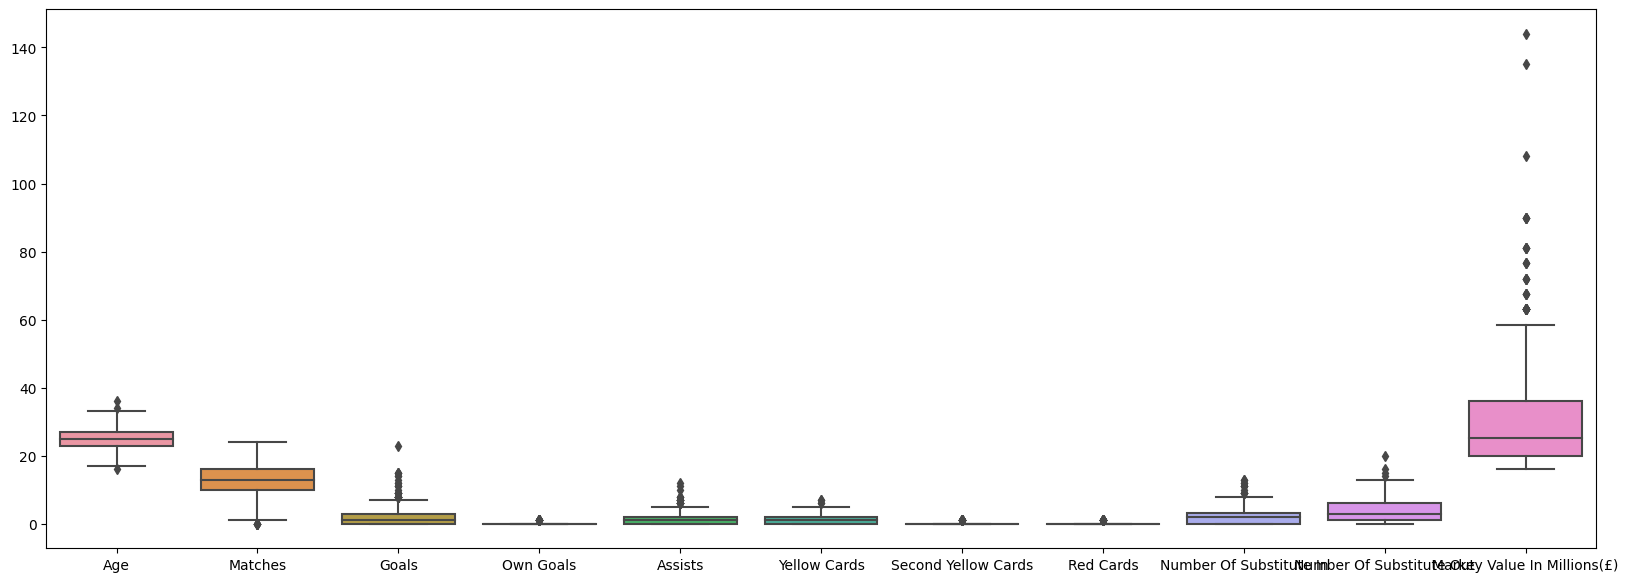

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=numeric_df)

In [ ]:

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = numeric_df.columns
d = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

Age   Matches     Goals  Own Goals   Assists  Yellow Cards  \
0  0.30  0.666667  0.304348        0.0  0.916667      0.428571   
1  0.25  0.416667  0.565217        0.0  0.333333      0.142857   
2  0.60  0.666667  0.304348        0.0  0.166667      0.285714   
3  0.50  0.625000  0.086957        0.0  0.250000      0.142857   
4  0.65  0.625000  0.652174        0.0  0.500000      0.142857   

   Second Yellow Cards  Red Cards  Number Of Substitute In  \
0                  0.0        0.0                 0.000000   
1                  0.0        0.0                 0.000000   
2                  0.0        0.0                 0.153846   
3                  0.0        0.0                 0.153846   
4                  0.0        0.0                 0.000000   

   Number Of Substitute Out  Markey Value In Millions(£)  
0                      0.40                     1.000000  
1                      0.05                     0.929577  
2                      0.10                     0.718310  
3                      0.40                     0.577465  
4                      0.15                     0.577465

<Axes: >

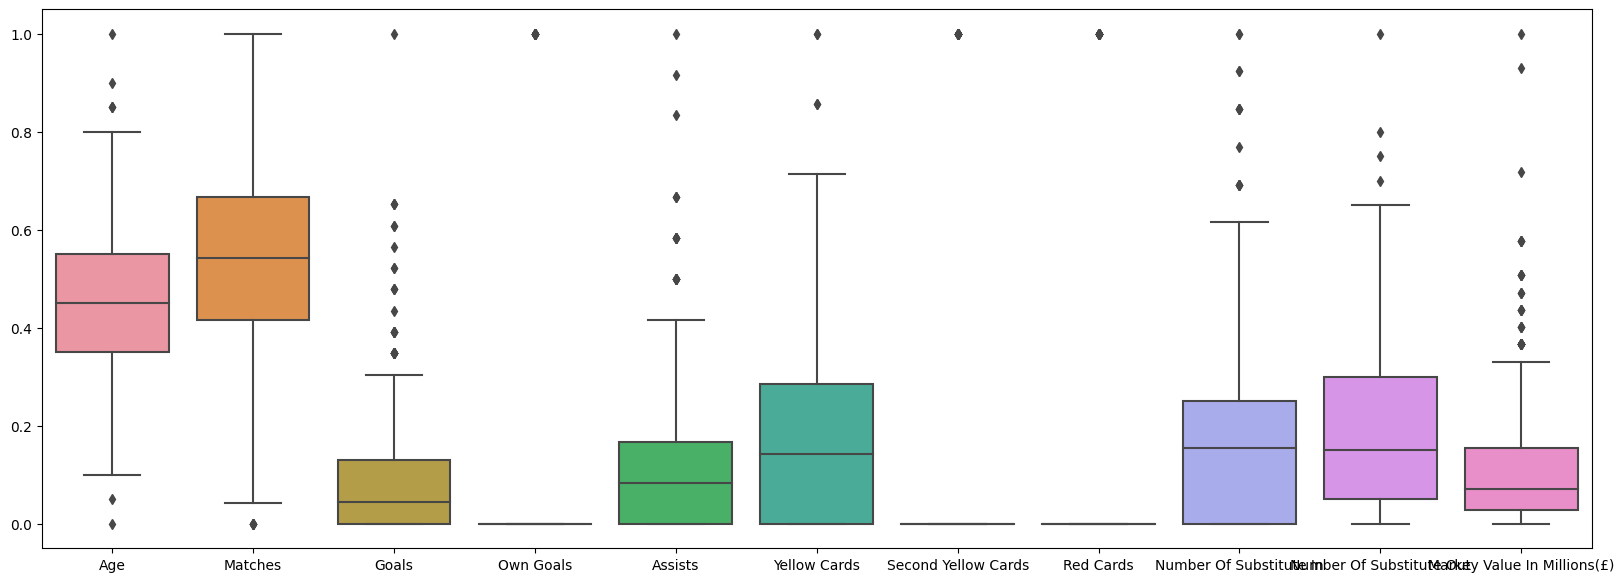

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=scaled_df)

In [ ]:
cat_df=df[['Position','Country', 'Club']]

In [ ]:
target = scaled_df["Markey Value In Millions(£)"]

In [ ]:
target.shape


(500,)

In [ ]:
features = pd.concat([scaled_df[['Age','Matches', 'Goals', 'Own Goals', 'Assists',
                       'Yellow Cards','Second Yellow Cards','Red Cards',
                       'Number Of Substitute In', 'Number Of Substitute Out']],cat_df], axis = 1, join = 'inner')

In [ ]:
features.shape

(500, 13)

In [ ]:
data = pd.concat([features,target], axis = 1, join = 'inner')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=25)


In [ ]:
X_train.head()


Age   Matches     Goals  Own Goals   Assists  Yellow Cards  \
195  0.45  0.375000  0.086957        0.0  0.000000      0.285714   
341  0.10  0.708333  0.260870        0.0  0.250000      0.285714   
209  0.20  0.416667  0.043478        0.0  0.333333      0.000000   
305  0.50  0.583333  0.086957        0.0  0.000000      0.142857   
481  0.40  0.625000  0.304348        0.0  0.500000      0.714286   

     Second Yellow Cards  Red Cards  Number Of Substitute In  \
195                  0.0        0.0                 0.076923   
341                  0.0        0.0                 0.692308   
209                  0.0        0.0                 0.307692   
305                  0.0        0.0                 0.230769   
481                  0.0        0.0                 0.076923   

     Number Of Substitute Out  Position  Country  Club  
195                      0.00         3       16     7  
341                      0.35         0       17    47  
209                      0.20         1       16    41  
305                      0.05         2        4    47  
481                      0.35         3       35    71

In [ ]:
y_train.shape


(335,)

###Linear Model

In [ ]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()

In [ ]:
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Markey Value In Millions(£)   R-squared (uncentered):                   0.485
Model:                                     OLS   Adj. R-squared (uncentered):              0.464
Method:                          Least Squares   F-statistic:                              23.32
Date:                         Thu, 30 Mar 2023   Prob (F-statistic):                    4.19e-39
Time:                                 02:23:24   Log-Likelihood:                          193.95
No. Observations:                          335   AIC:                                     -361.9
Df Residuals:                              322   BIC:                                     -312.3
Df Model:                                   13                                                  
Covariance Type:                     nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0933      0.040      2.351      0.019       0.015       0.171
Matches                      0.1139      0.053      2.152      0.032       0.010       0.218
Goals                        0.1961      0.079      2.475      0.014       0.040       0.352
Own Goals                   -0.0287      0.046     -0.630      0.529      -0.118       0.061
Assists                      0.2282      0.057      4.021      0.000       0.117       0.340
Yellow Cards                -0.0203      0.044     -0.463      0.644      -0.106       0.066
Second Yellow Cards          0.0697      0.041      1.694      0.091      -0.011       0.151
Red Cards                    0.0003      0.039      0.008      0.993      -0.076       0.077
Number Of Substitute In     -0.0597      0.046     -1.285      0.200      -0.151       0.032
Number Of Substitute Out    -0.1404      0.060     -2.326      0.021      -0.259      -0.022
Position                    -0.0011      0.002     -0.500      0.618      -0.005       0.003
Country                      0.0003      0.000      0.686      0.493      -0.001       0.001
Club                         0.0002      0.000      0.631      0.529      -0.000       0.001
==============================================================================
Omnibus:                      116.476   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.791
Skew:                           1.571   Prob(JB):                     6.12e-80
Kurtosis:                       7.032   Cond. No.                         551.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.091310
RMSE: 0.123392
R2 0.034879



###TREE BASED MODELS

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

-0.23804417087736796


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*30)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
-0.23804417087736796


In [ ]:
prediction_tree = DTree.predict(X_test)


In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.102998
RMSE: 0.139754
R2 -0.238044


[Text(0.5, 0.875, 'Goals <= 0.109\nsquared_error = 0.02\nsamples = 335\nvalue = 0.124'),
 Text(0.25, 0.625, 'Assists <= 0.375\nsquared_error = 0.01\nsamples = 232\nvalue = 0.098'),
 Text(0.125, 0.375, 'Second Yellow Cards <= 0.5\nsquared_error = 0.009\nsamples = 225\nvalue = 0.093'),
 Text(0.0625, 0.125, 'squared_error = 0.008\nsamples = 217\nvalue = 0.088'),
 Text(0.1875, 0.125, 'squared_error = 0.026\nsamples = 8\nvalue = 0.221'),
 Text(0.375, 0.375, 'Number Of Substitute In <= 0.038\nsquared_error = 0.015\nsamples = 7\nvalue = 0.258'),
 Text(0.3125, 0.125, 'squared_error = 0.001\nsamples = 3\nvalue = 0.366'),
 Text(0.4375, 0.125, 'squared_error = 0.011\nsamples = 4\nvalue = 0.176'),
 Text(0.75, 0.625, 'Number Of Substitute In <= 0.038\nsquared_error = 0.038\nsamples = 103\nvalue = 0.182'),
 Text(0.625, 0.375, 'Age <= 0.325\nsquared_error = 0.081\nsamples = 17\nvalue = 0.308'),
 Text(0.5625, 0.125, 'squared_error = 0.103\nsamples = 5\nvalue = 0.577'),
 Text(0.6875, 0.125, 'squared_er

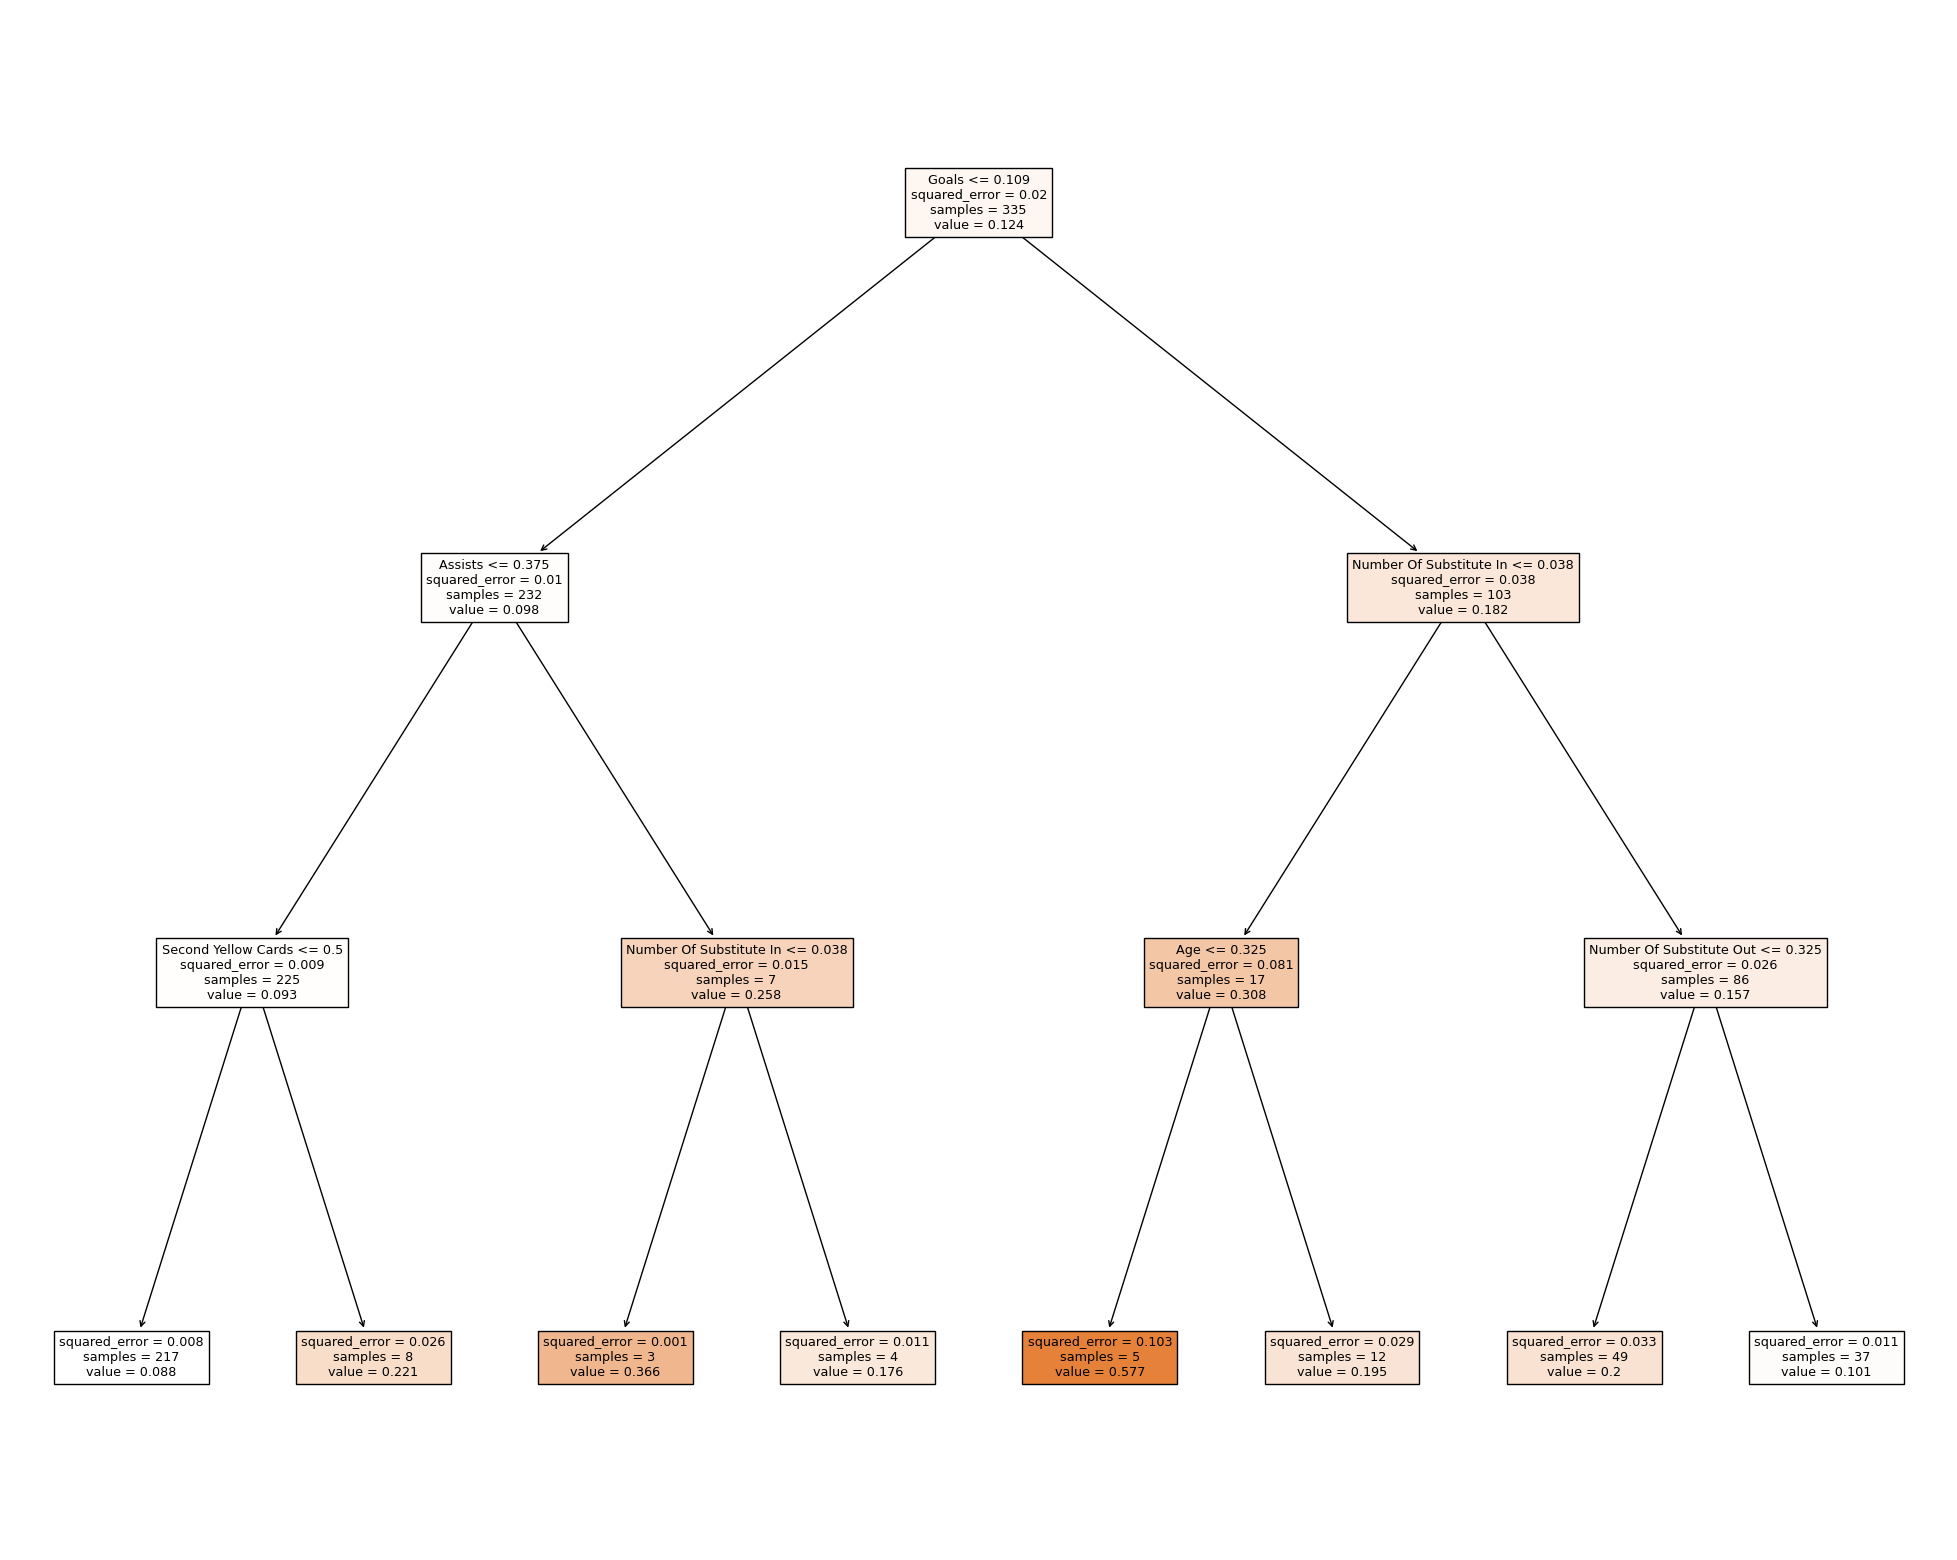

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

###AUTOML

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=e7165c5044b90cee7e4b0996794e683c7c0865826b6b9970eb7bc401d67ee161
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc6qt76ex
  JVM stdout: /tmp/tmpc6qt76ex/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc6qt76ex/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_bw470o
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [ ]:
data.isna().sum()

Age                            0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
Position                       0
Country                        0
Club                           0
Markey Value In Millions(£)    0
dtype: int64

In [ ]:
dataset_train = data.sample(frac=.2)
dataset_test = data.drop(dataset_train.index)

In [ ]:
dataset_train.shape


(100, 14)

In [ ]:
features_autoML = list(features.columns)
features_autoML

['Age',
 'Matches',
 'Goals',
 'Own Goals',
 'Assists',
 'Yellow Cards',
 'Second Yellow Cards',
 'Red Cards',
 'Number Of Substitute In',
 'Number Of Substitute Out',
 'Position',
 'Country',
 'Club']

In [ ]:
target_autoML = 'Markey Value In Millions(£)'


In [ ]:
dataset_train.head()


Age   Matches     Goals  Own Goals   Assists  Yellow Cards  \
264  0.55  0.458333  0.000000        0.0  0.000000      0.000000   
336  0.60  0.833333  0.347826        0.0  0.250000      0.571429   
446  0.70  0.541667  0.000000        0.0  0.083333      0.571429   
440  0.50  0.750000  0.086957        0.0  0.333333      0.571429   
226  0.60  0.666667  0.086957        0.0  0.083333      0.428571   

     Second Yellow Cards  Red Cards  Number Of Substitute In  \
264                  0.0        0.0                 0.000000   
336                  0.0        0.0                 0.538462   
446                  0.0        0.0                 0.000000   
440                  0.0        0.0                 0.307692   
226                  0.0        0.0                 0.307692   

     Number Of Substitute Out  Position  Country  Club  \
264                      0.05         2       20    15   
336                      0.45        10       39    58   
446                      0.05        11        5    36   
440                      0.15         4       20    58   
226                      0.60         0       51     8   

     Markey Value In Millions(£)  
264                     0.063380  
336                     0.042254  
446                     0.014085  
440                     0.014085  
226                     0.084507

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
datasetAutoML.head()


Age    Matches      Goals    Own Goals    Assists    Yellow Cards    Second Yellow Cards    Red Cards    Number Of Substitute In    Number Of Substitute Out    Position    Country    Club    Markey Value In Millions(£)
-----  ---------  ---------  -----------  ---------  --------------  ---------------------  -----------  -------------------------  --------------------------  ----------  ---------  ------  -----------------------------
 0.55   0.458333  0                    0  0                0                             0            0                  0                                0.05           2         20      15                      0.0633803
 0.6    0.833333  0.347826             0  0.25             0.571429                      0            0                  0.538462                         0.45          10         39      58                      0.0422535
 0.7    0.541667  0                    0  0.0833333        0.571429                      0            0                  0                                0.05          11          5      36                      0.0140845
 0.5    0.75      0.0869565            0  0.333333         0.571429                      0            0                  0.307692                         0.15           4         20      58                      0.0140845
 0.6    0.666667  0.0869565            0  0.0833333        0.428571                      0            0                  0.307692                         0.6            0         51       8                      0.084507
 0.4    0.458333  0                    0  0                0                             0            1                  0.0769231                        0.05           2         16       7                      0.0492958
 0.35   0.541667  0                    0  0                0                             0            0                  0                                0              2         17      61                      0.295775
 0.55   0.541667  0.0434783            0  0.416667         0.142857                      0            0                  0.0769231                        0.15           1         11      21                      0.190141
 0.5    0.708333  0                    0  0                0.428571                      0            0                  0.0769231                        0.1            2         17      50                      0.15493
 0.45   0.833333  0.130435             1  0.333333         0.428571                      0            0                  0.769231                         0.3            7          5      58                      0
[10 rows x 14 columns]

In [ ]:
aml = H2OAutoML()
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)


AutoML progress: |█
02:24:02.340: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_7_AutoML_1_20230330_22359


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       2/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0017783614485307095
RMSE: 0.042170623051251084
MAE: 0.03305463092399216
RMSLE: 0.03515301925637549
Mean Residual Deviance: 0.0017783614485307095
R^2: 0.8870035127287587
Null degrees of freedom: 99
Residual degrees of freedom: 97
Null deviance: 1.573820117312019
Residual deviance: 0.17783614485307095
AIC: -341.41858067542154

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.013142533876694578
RMSE: 0.11464089094513605
MAE: 0.08625030669261523
RMSLE: 0.09608879802538892
Mean Residual Deviance: 0.013142533876694578
R^2: 0.16492782547848206
Null degrees of freedom: 99
Residual degrees of freedom: 96
Null deviance: 1.6480822731836084
Residual deviance: 1.3142533876694578
AIC: -139.40243812200157

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.096823   0.0199146  0.117292      0.115855      0.0946576     0.0853487     0.0709616
mean_residual_deviance  0.0157254  0.0082356  0.0261659     0.0224717     0.0127607     0.0104667     0.00676209
mse                     0.0157254  0.0082356  0.0261659     0.0224717     0.0127607     0.0104667     0.00676209
null_deviance           0.329616   0.199761   0.654148      0.382344      0.199088      0.251201      0.1613
r2                      -0.101739  0.119216   -0.144971     -0.00556809   0.0203383     -0.101174     -0.277321
residual_deviance       0.31831    0.20531    0.654148      0.359546      0.191411      0.251201      0.135242
rmse                    0.121833   0.0332051  0.161759      0.149905      0.112963      0.102307      0.0822319
rmsle                   0.103416   0.0232112  0.130703      0.123323      0.0982335     0.0896538     0.0751689

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard

In [ ]:
preds = aml.predict(datasetAutoMLTest)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


###SHAP ANALYSIS

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 42.3 MB/s eta 0:00:00


In [ ]:
import shap

###SHAP Analysis of Linear Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


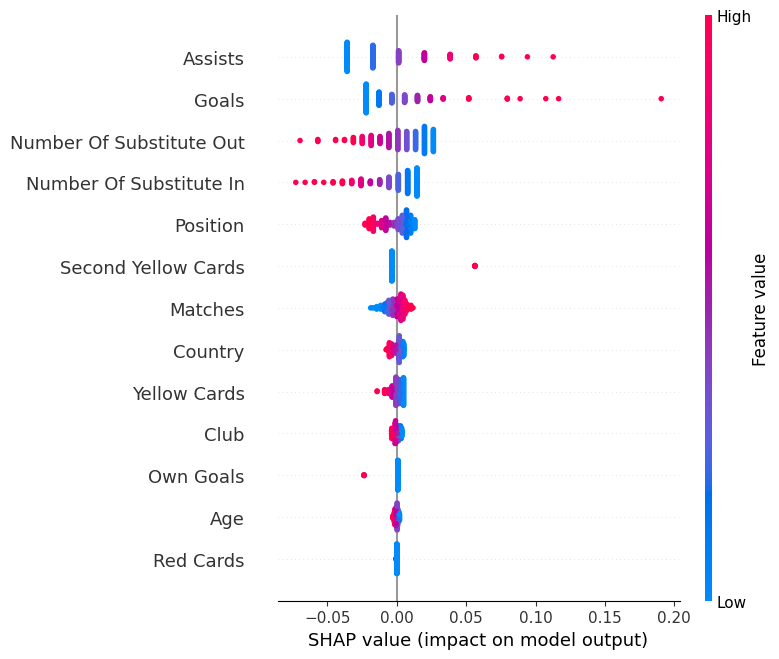

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

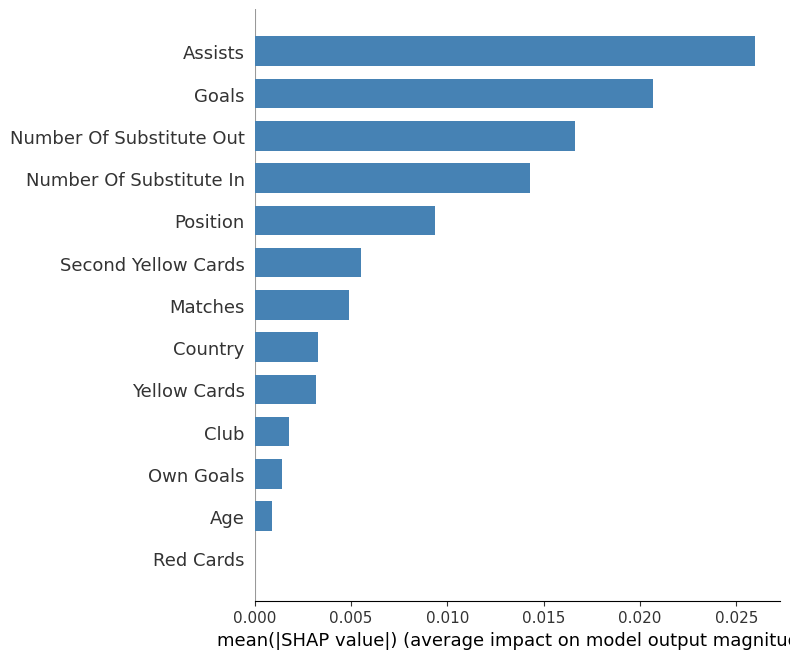

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

###SHAP Analysis of Tree Model

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

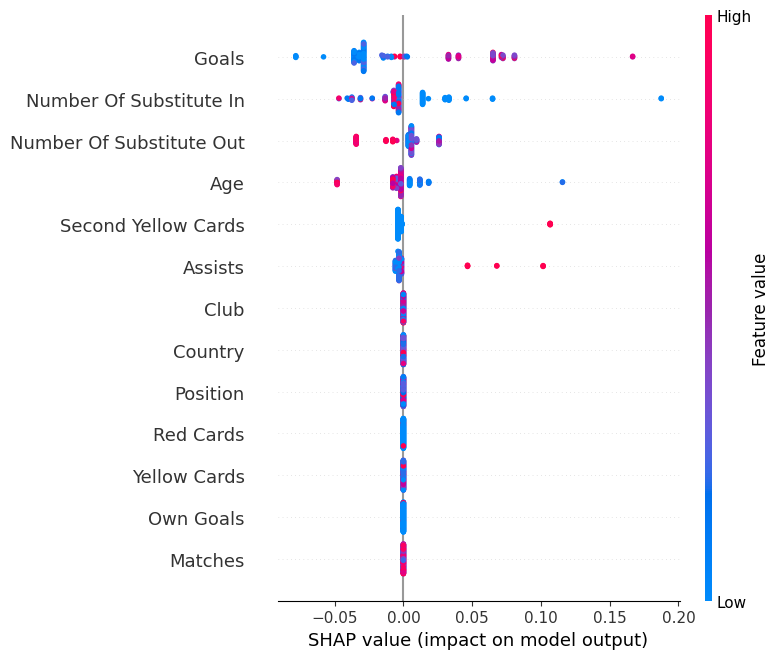

In [ ]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

###SHAP Analysis of AutoML Model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                          rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
--------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ------
GBM_grid_1_AutoML_1_20230330_22359_model_131  0.135429  0.018341   0.0971725  0.109019                 0.018341                   20                   0.004736  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_118  0.135439  0.0183437  0.0967606  0.109019                 0.0183437                  35                   0.004712  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_40   0.135439  0.0183437  0.0968921  0.109092                 0.0183437                  23                   0.00518   GBM
GBM_grid_1_AutoML_1_20230330_22359_model_151  0.135647  0.0184     0.0967404  0.109062                 0.0184                     24                   0.004236  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_189  0.135774  0.0184345  0.0966734  0.108996                 0.0184345                  22                   0.004805  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_177  0.135867  0.0184599  0.0970242  0.109659                 0.0184599                  33                   0.004532  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_91   0.136156  0.0185385  0.0975135  0.109515                 0.0185385                  20                   0.004634  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_8    0.136158  0.018539   0.0964455  0.109433                 0.018539                   53                   0.005927  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_9    0.136205  0.0185517  0.0964451  0.109596                 0.0185517                  26                   0.004671  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_138  0.136253  0.0185649  0.0980055  0.109762                 0.0185649                  24                   0.004882  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_160  0.136254  0.0185653  0.0978341  0.110304                 0.0185653                  35                   0.006286  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_94   0.136275  0.0185708  0.0970501  0.109941                 0.0185708                  40                   0.004762  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_43   0.136394  0.0186032  0.0977282  0.110064                 0.0186032                  36                   0.005794  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_61   0.136405  0.0186062  0.099213   0.110328                 0.0186062                  33                   0.005749  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_111  0.136412  0.0186083  0.0966531  0.109711                 0.0186083                  24                   0.004709  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_153  0.136428  0.0186125  0.0978818  0.110359                 0.0186125                  38                   0.006372  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_135  0.136432  0.0186138  0.0968144  0.109774                 0.0186138                  23                   0.005085  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_97   0.136457  0.0186206  0.0965952  0.109581                 0.0186206                  18                   0.005364  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_186  0.136504  0.0186334  0.0977354  0.110067                 0.0186334                  30                   0.004794  GBM
GBM_grid_1_AutoML_1_20230330_22359_model_124  0.136575  0.0186528  0.0973215  0.110094                 0.0186528                  29                   0.005495  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

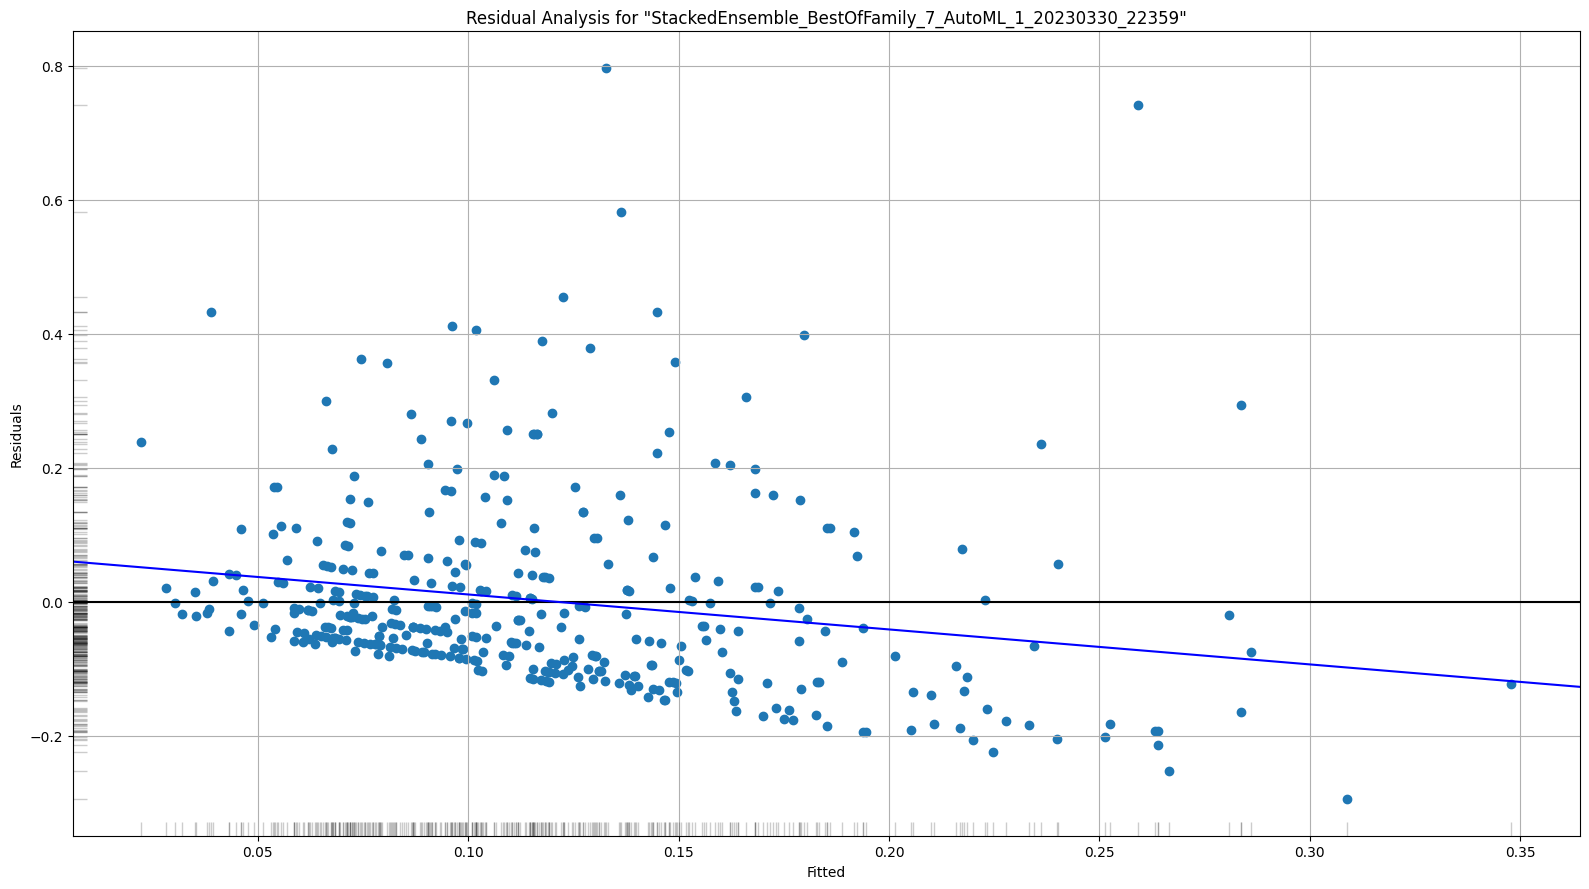

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

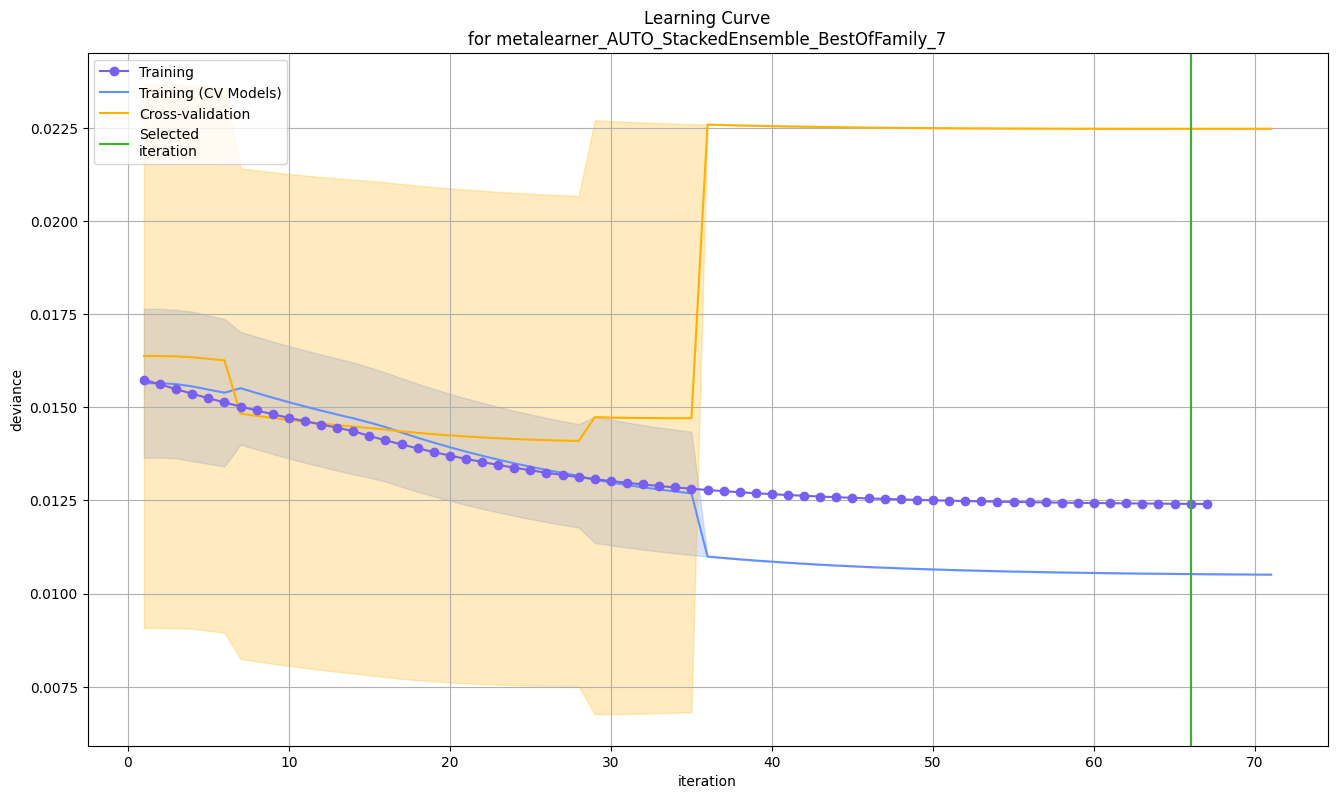

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

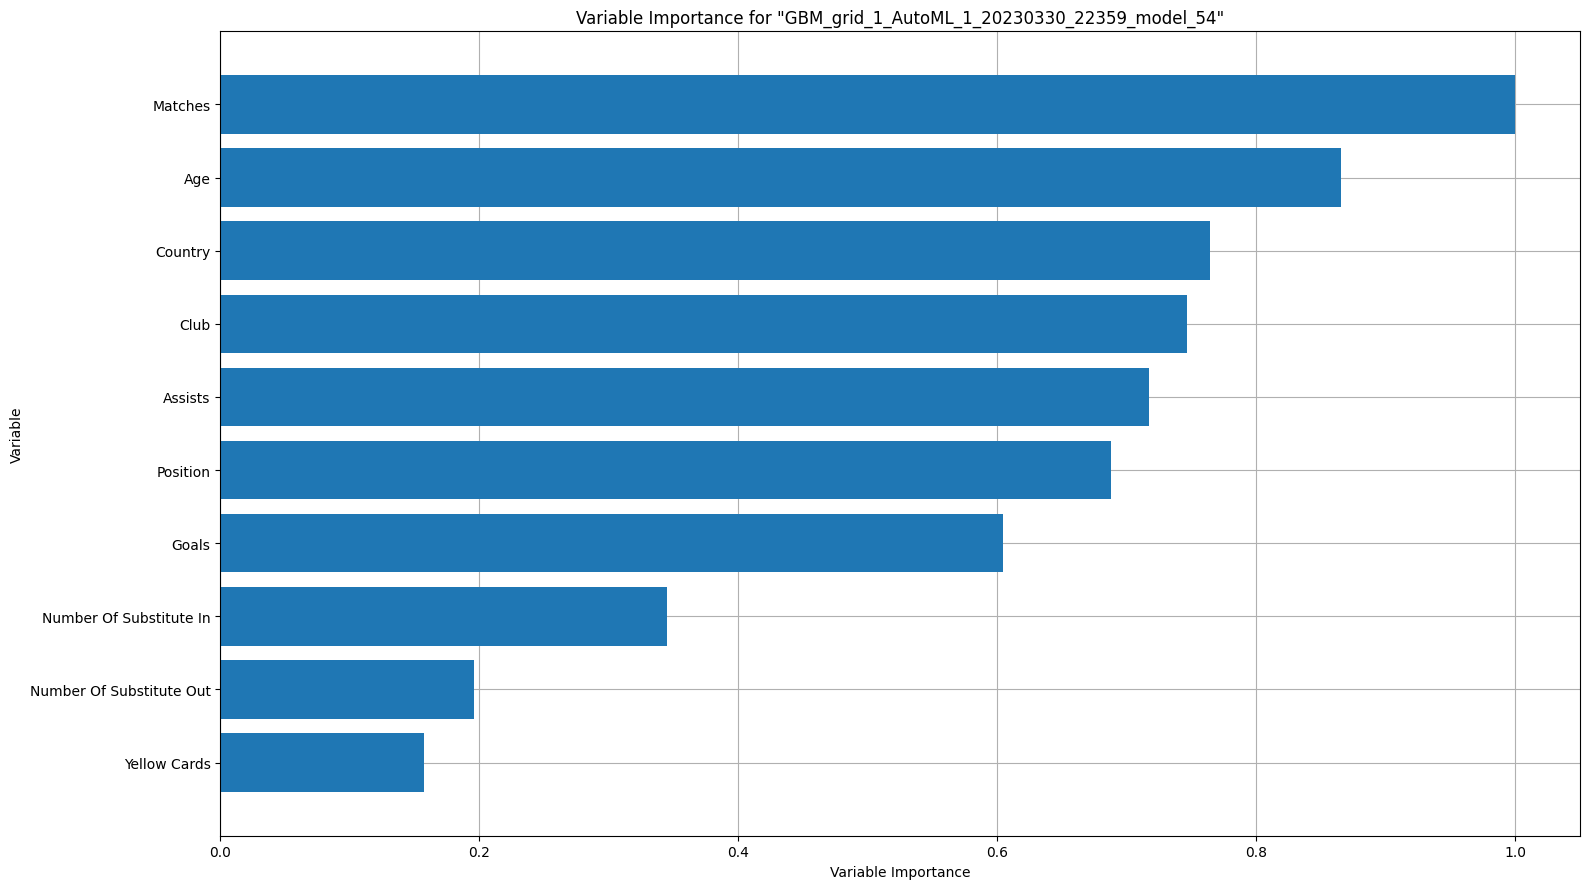

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

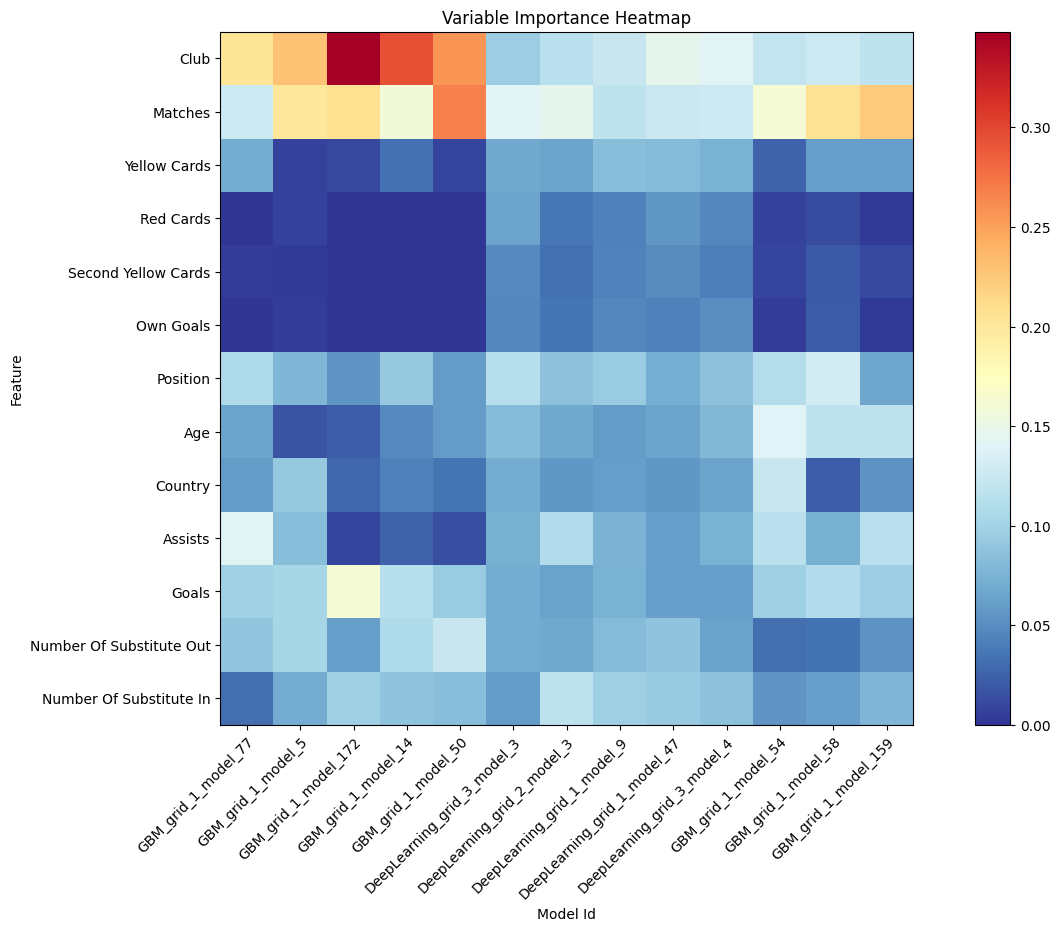

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

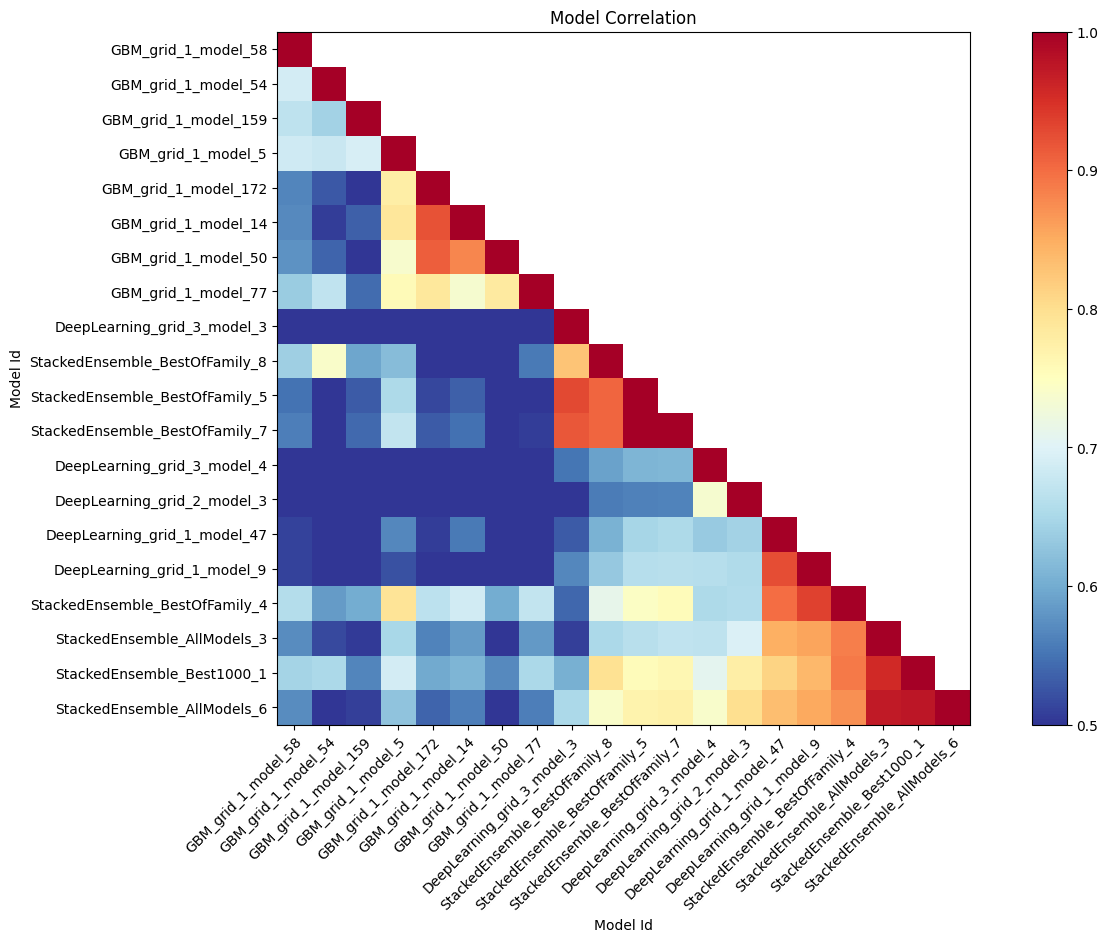

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

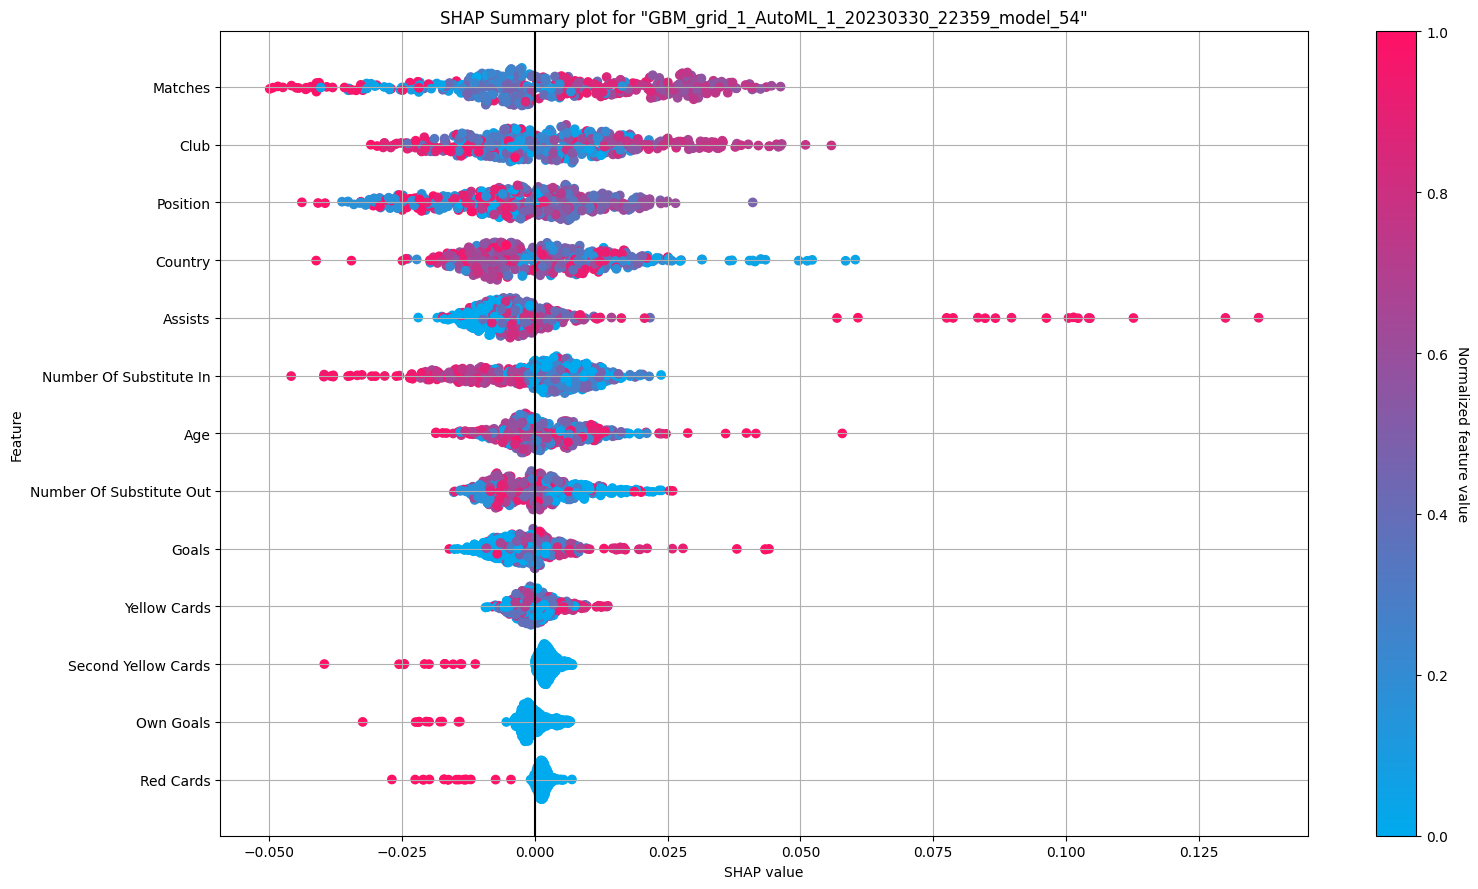

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

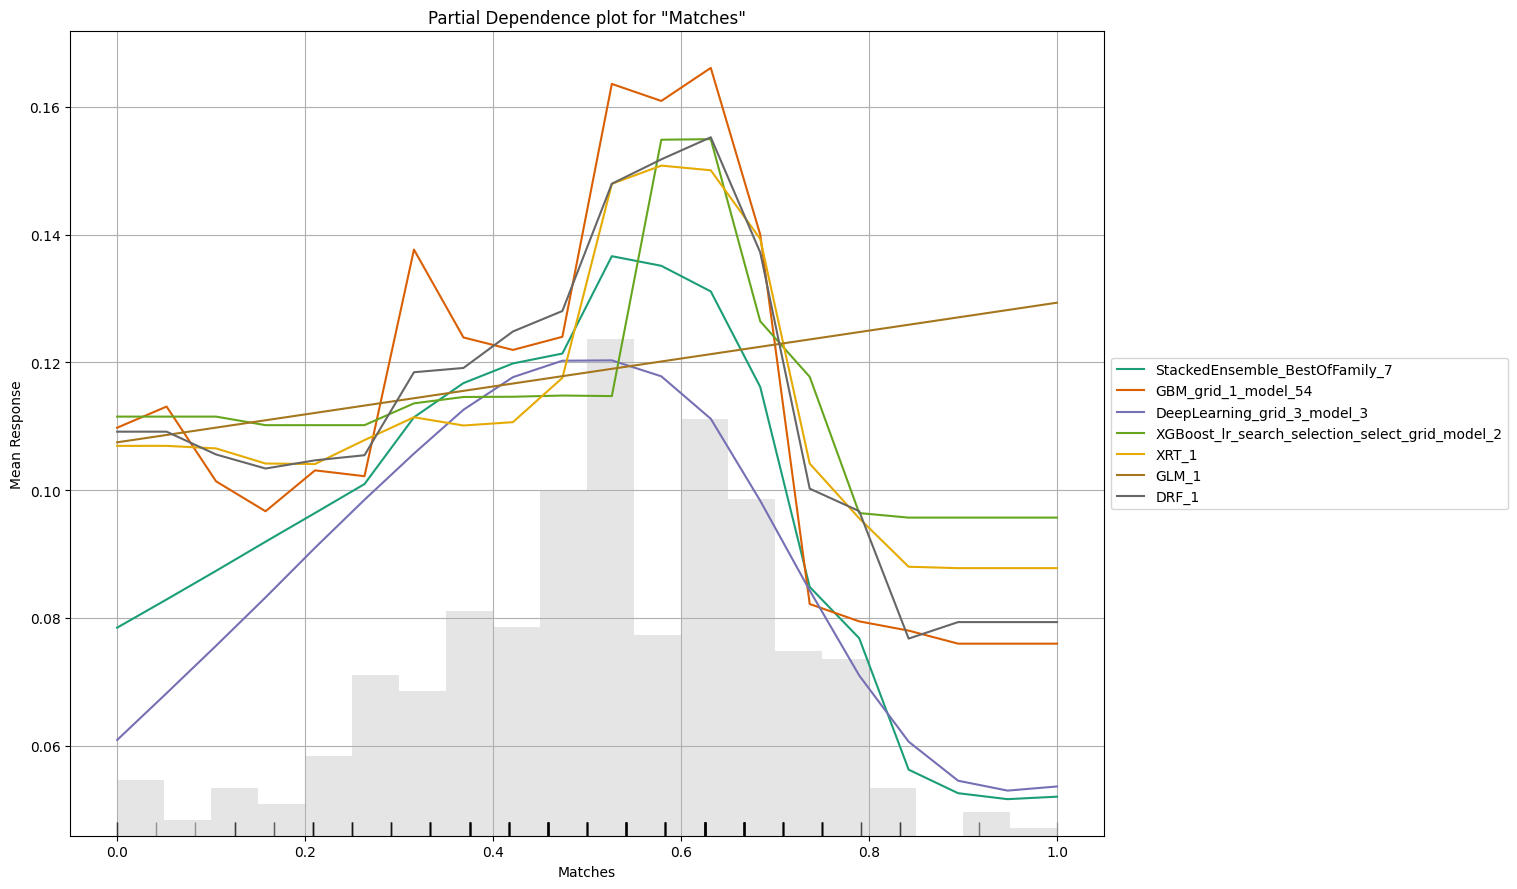

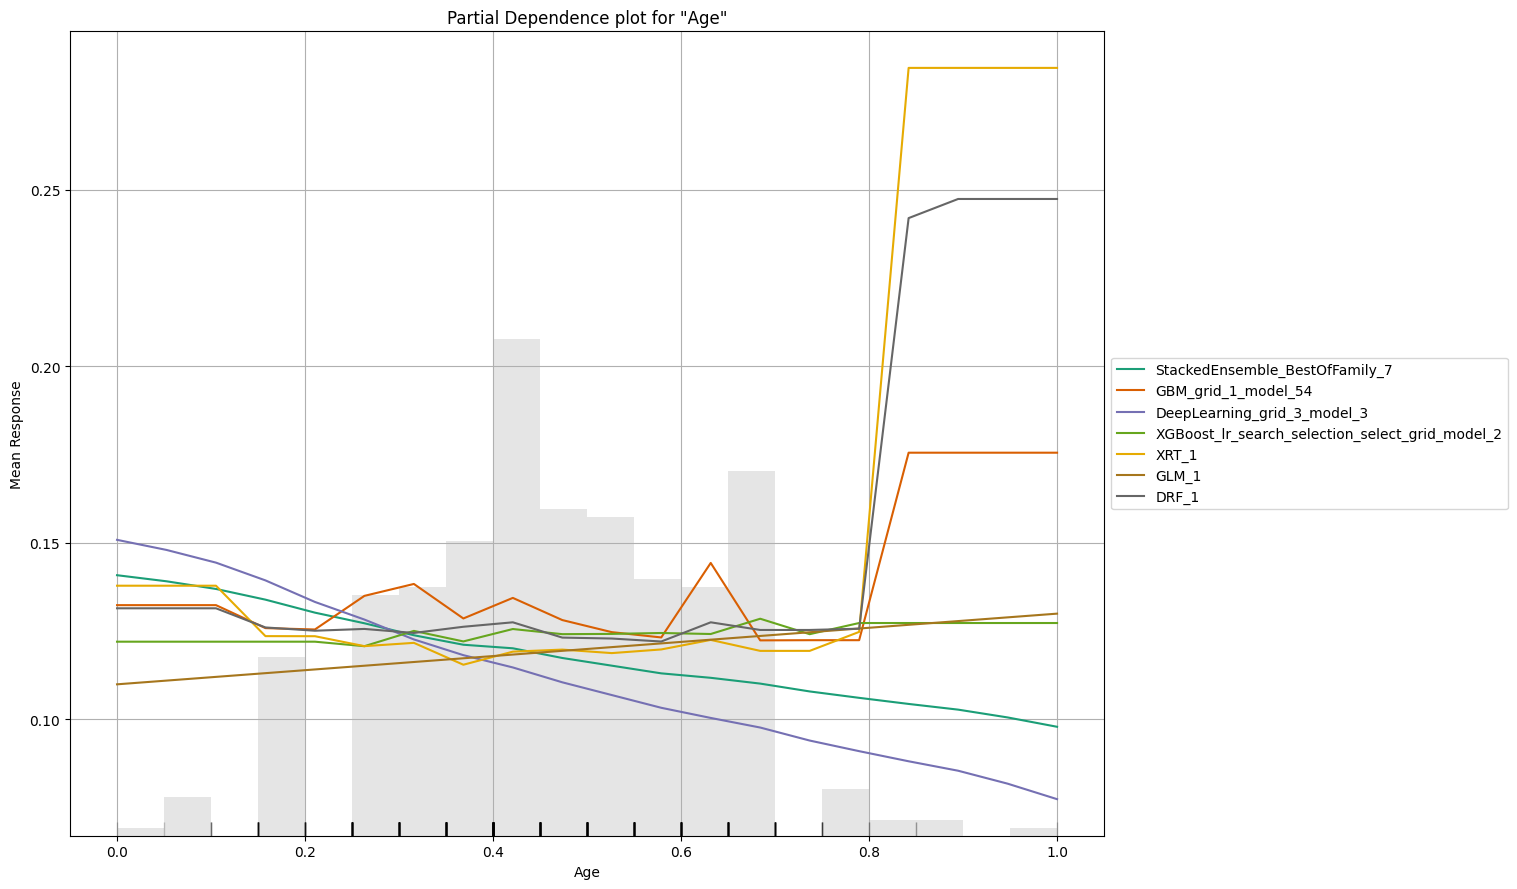

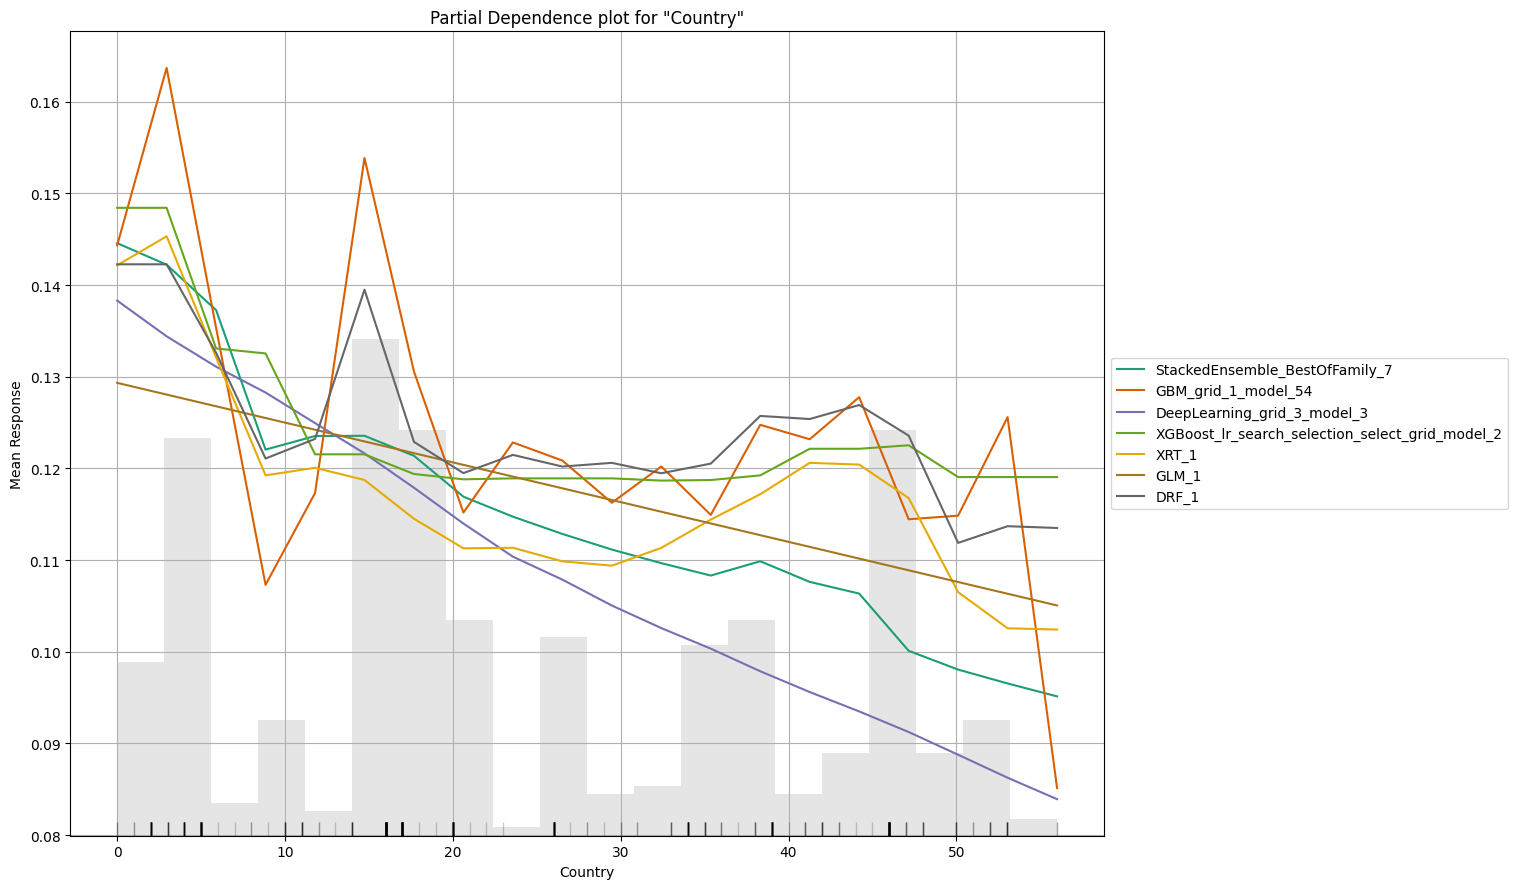

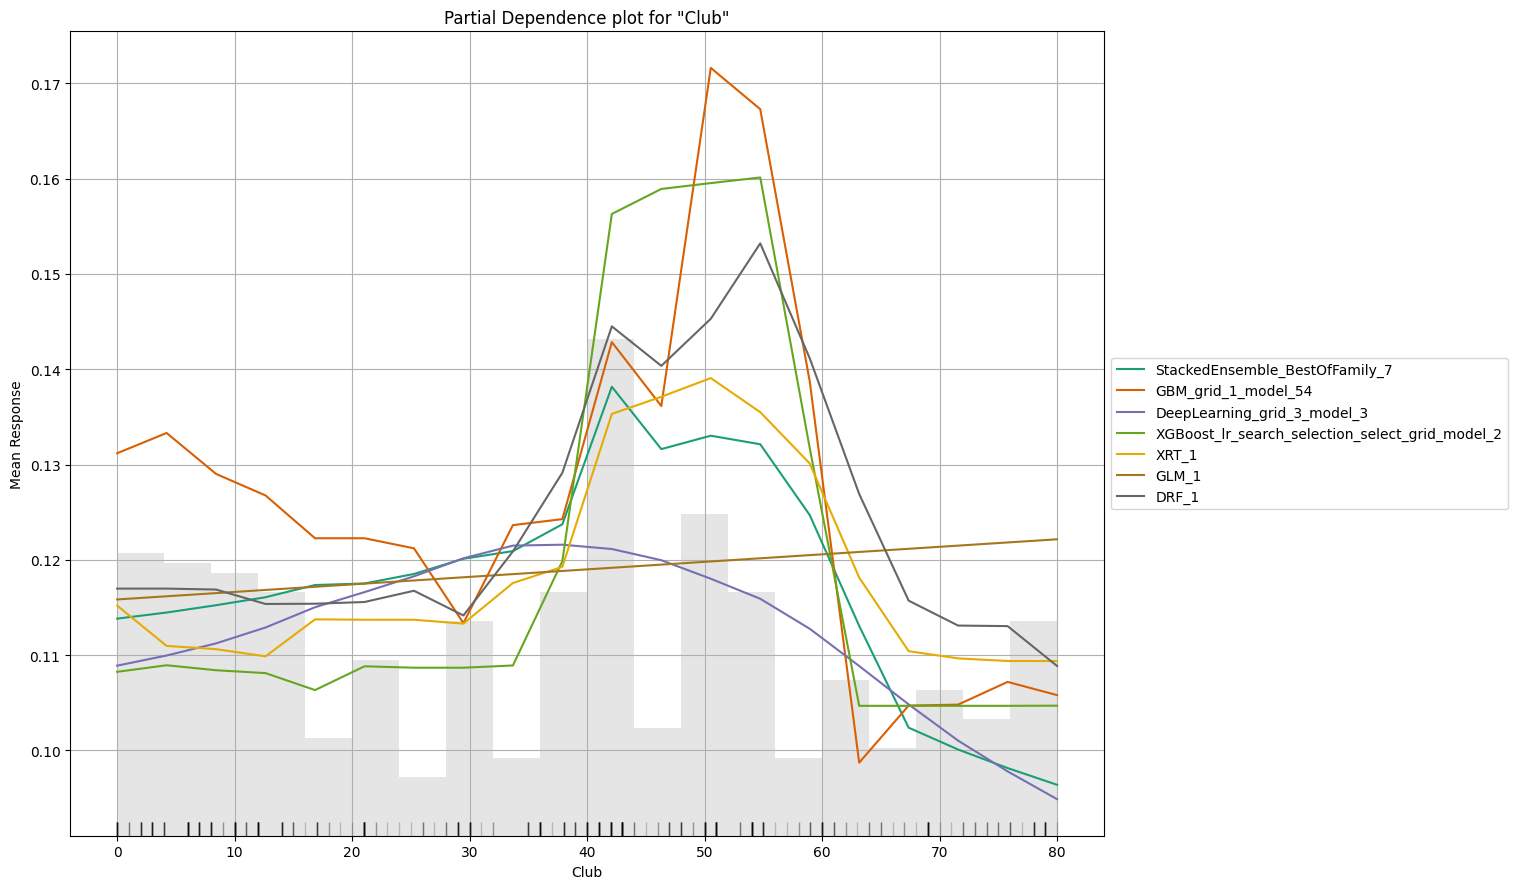

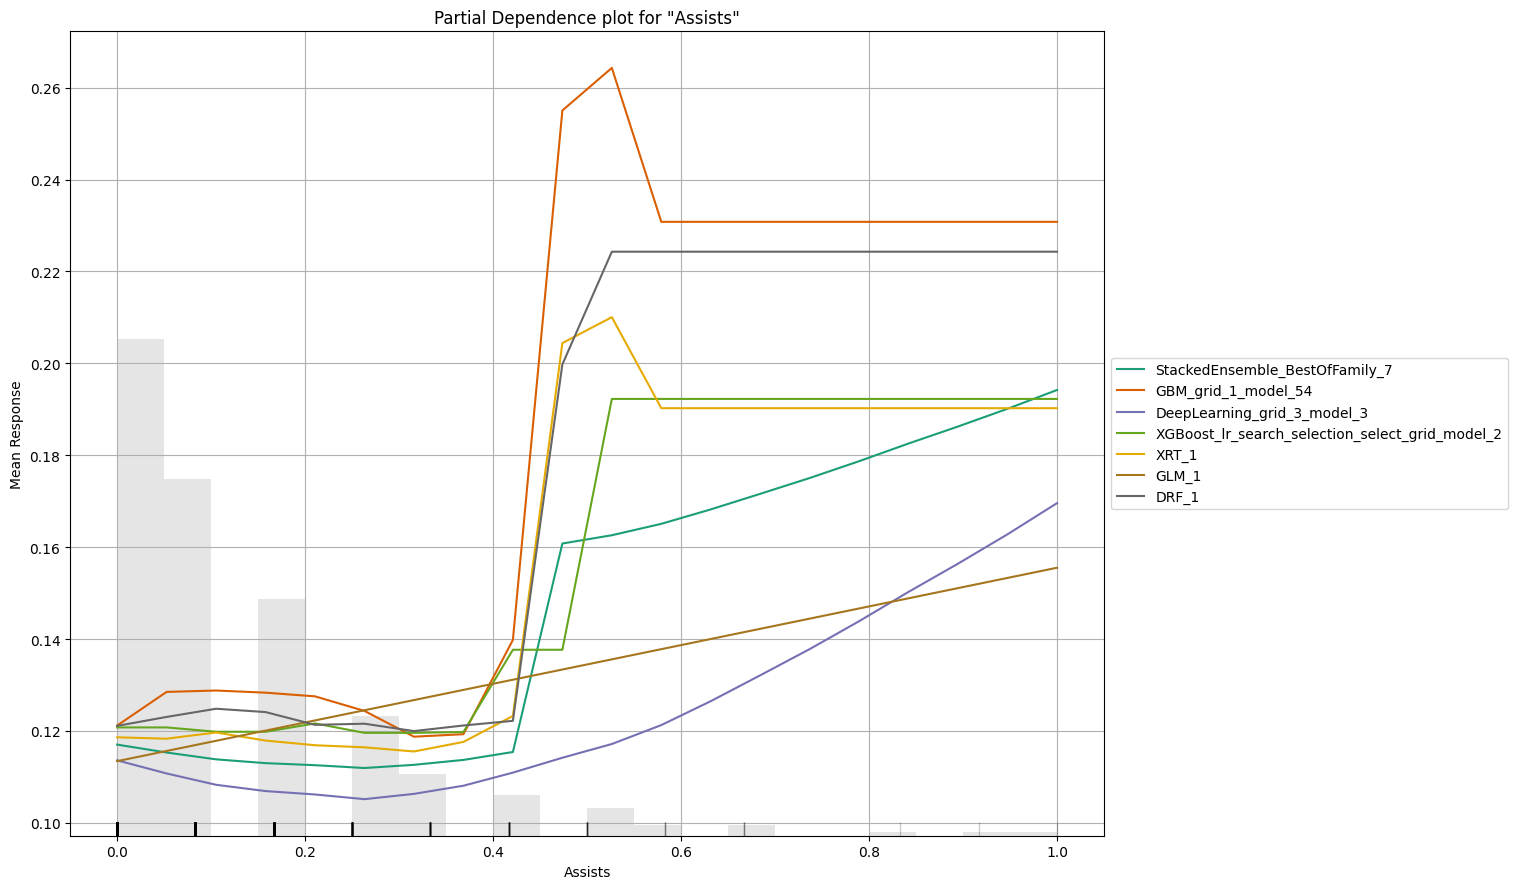

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

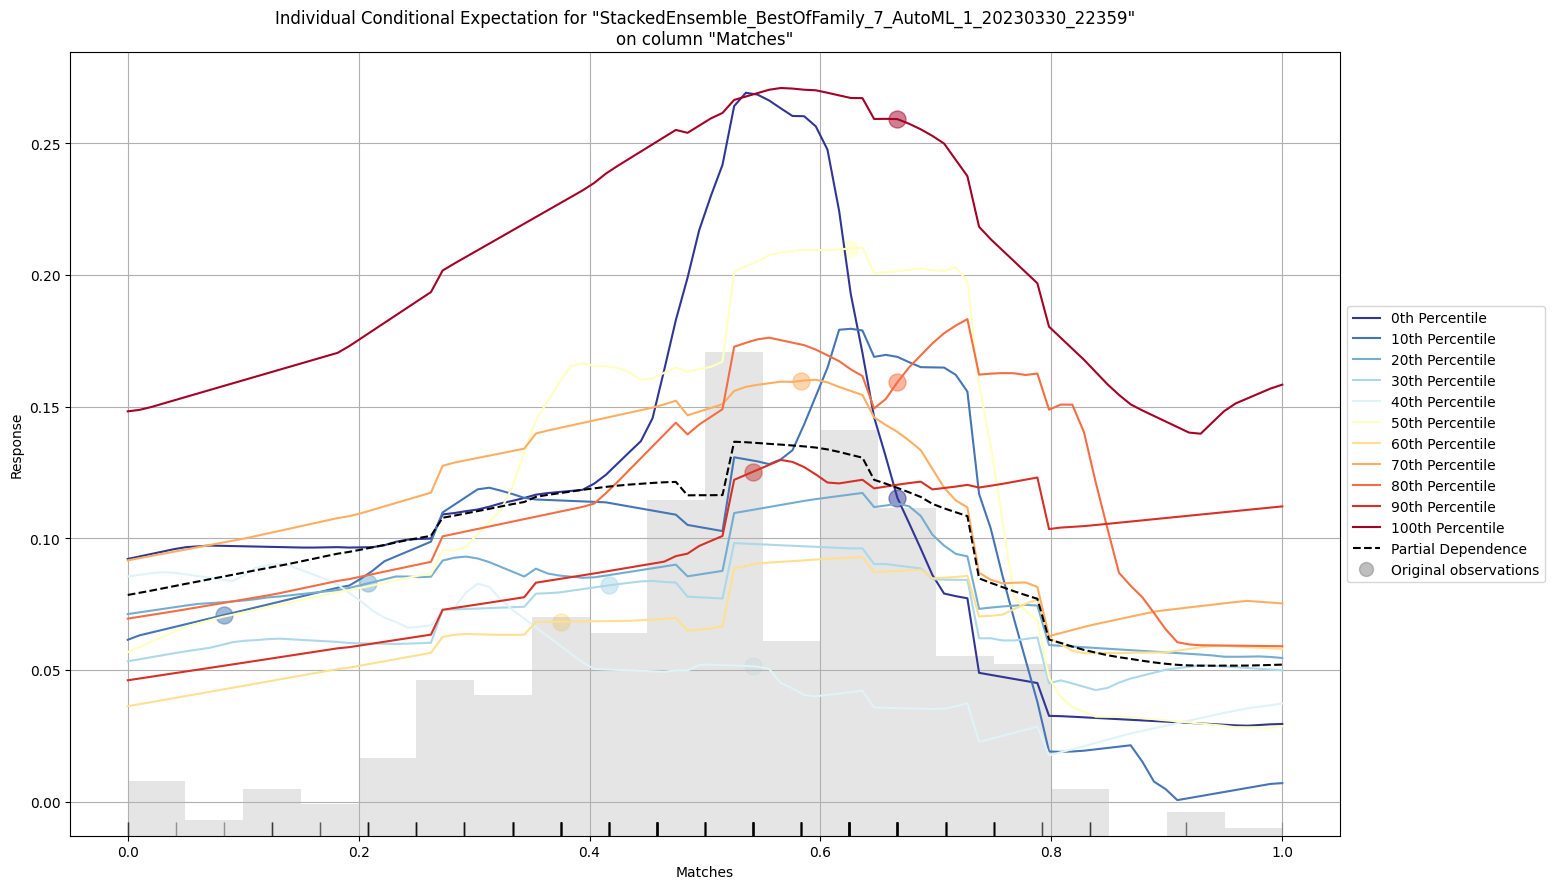

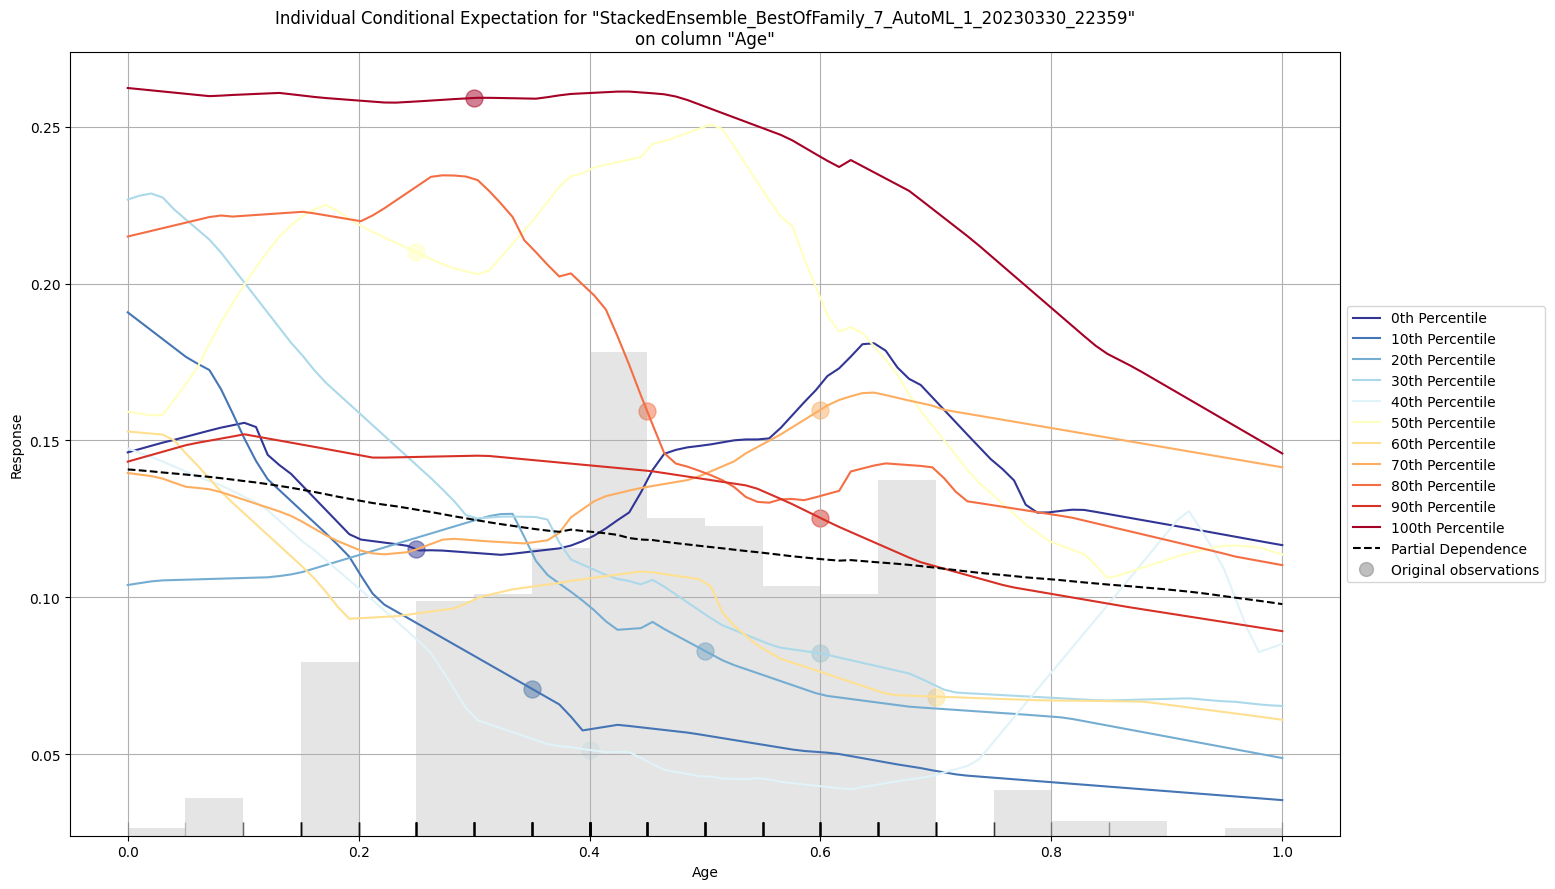

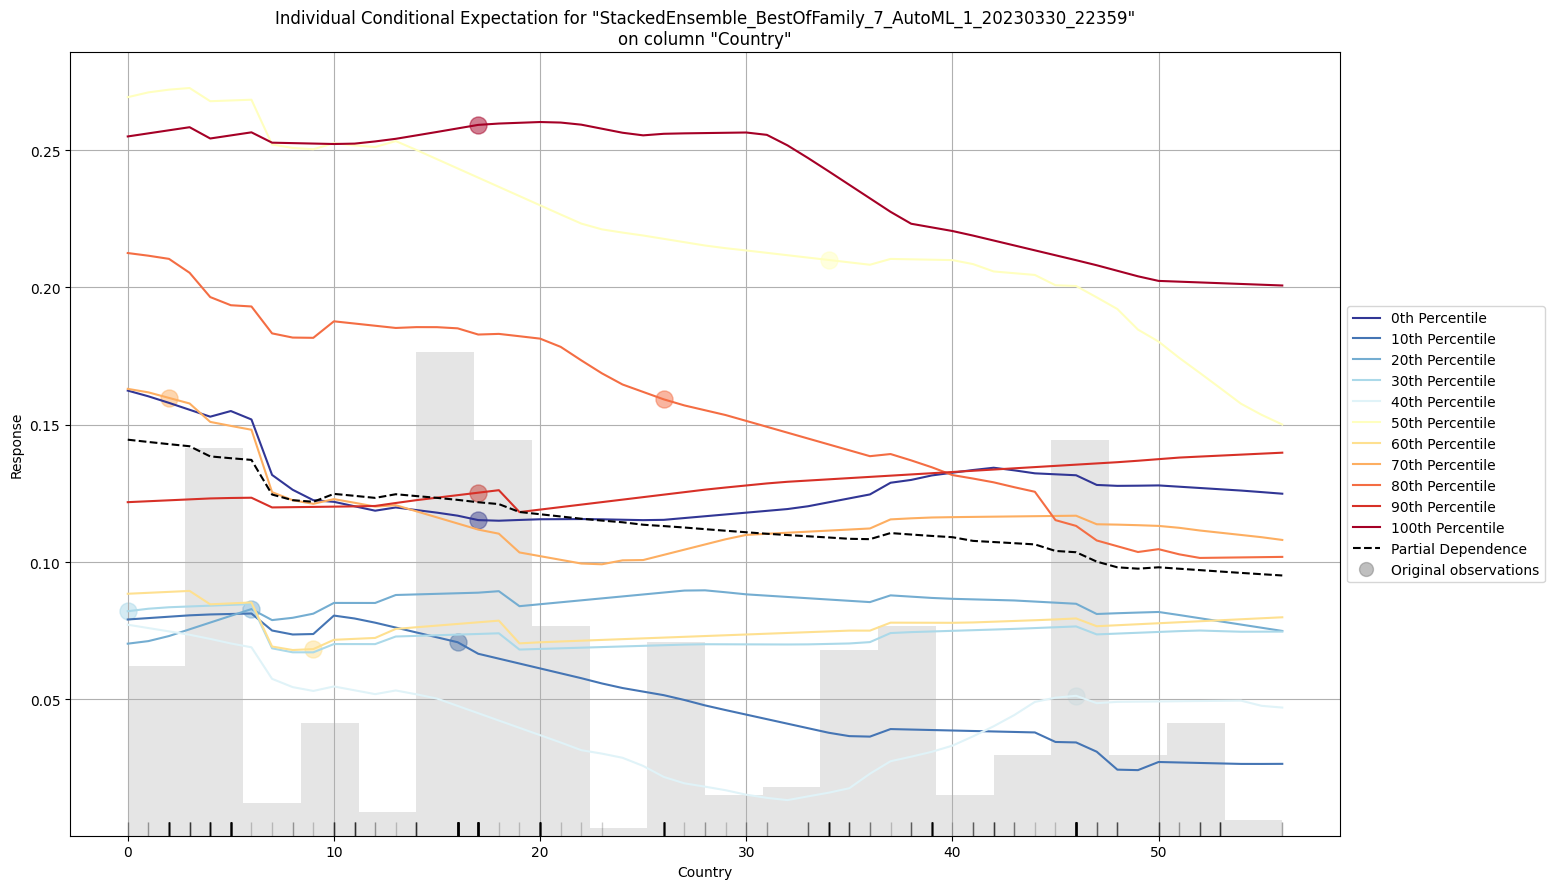

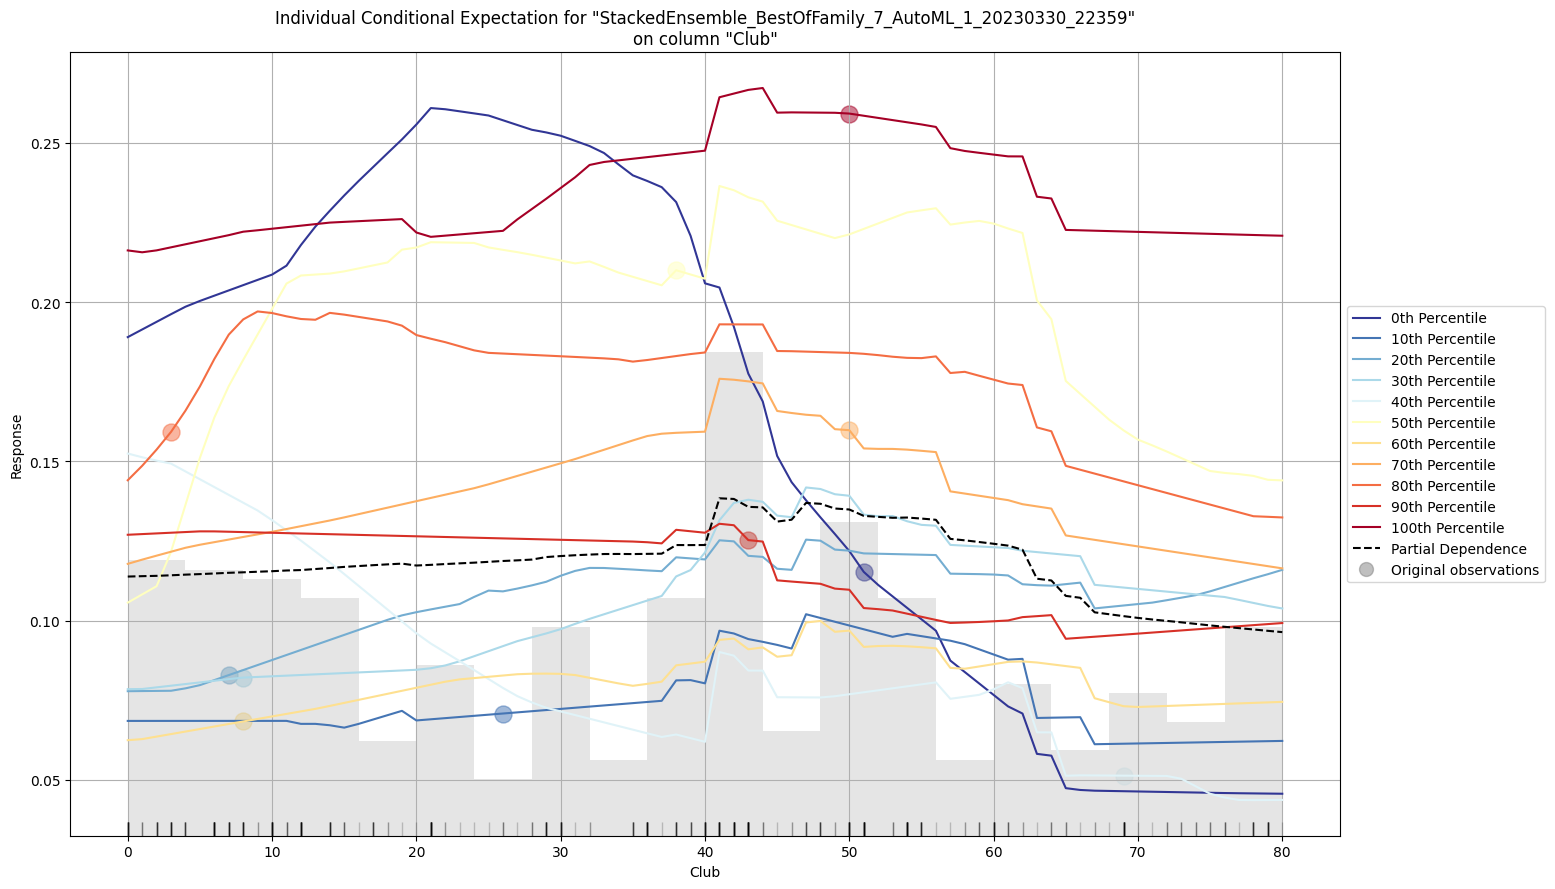

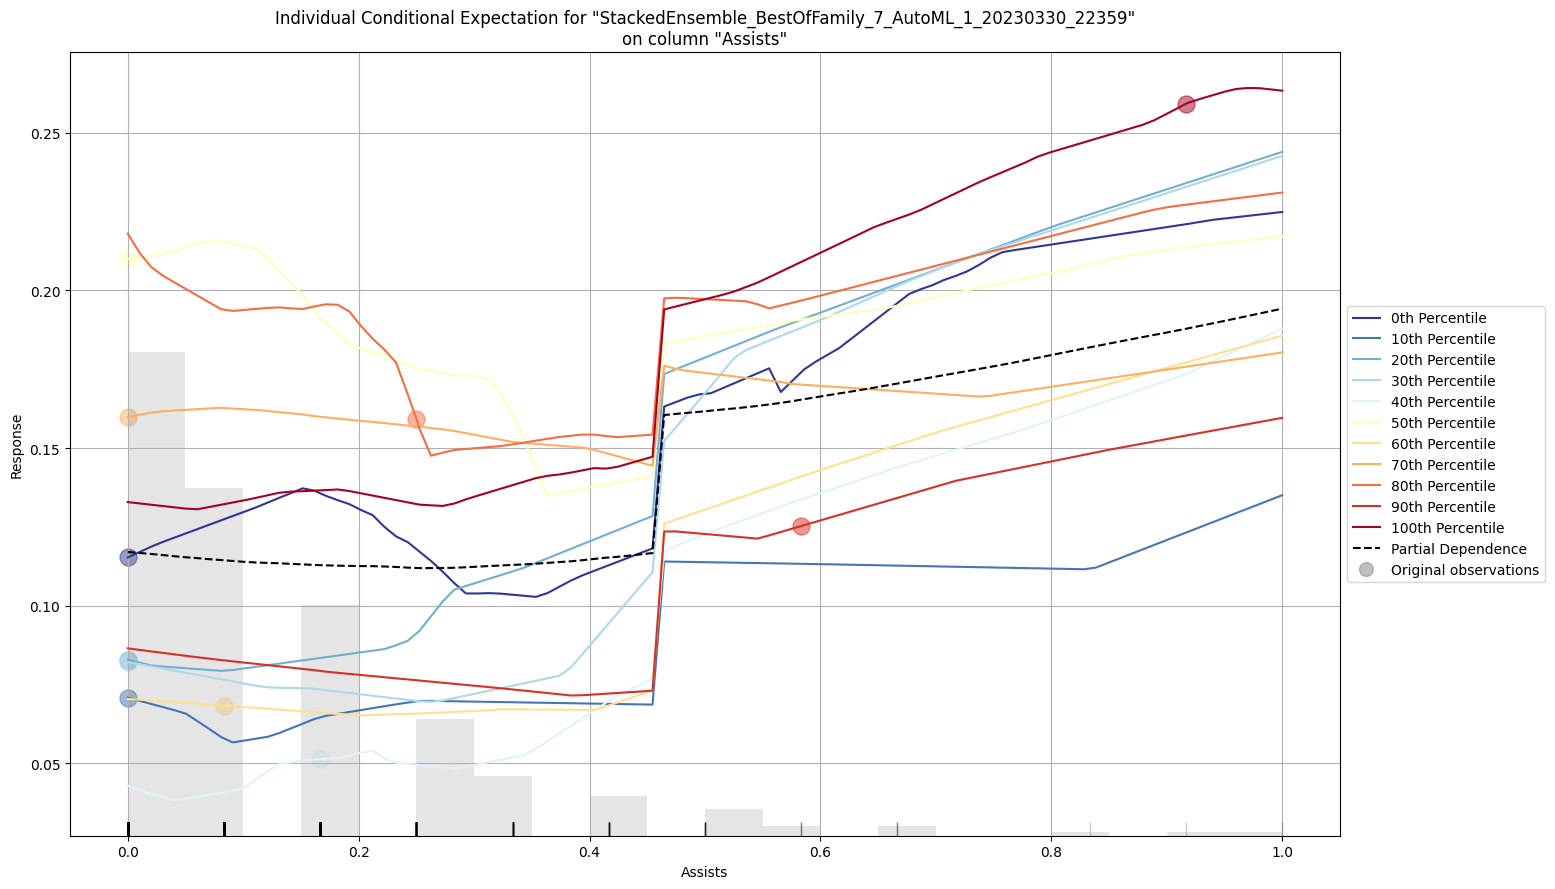

In [ ]:
exm = aml.explain(datasetAutoMLTest)

In [ ]:
!pip install lime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=448947e3e884bc37c8d295fa0a097bb3a888dcf36448509fcb2be610c987d4b1
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime.lime_tabular


In [ ]:
from lime import lime_tabular

In [ ]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", lin_reg.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], lin_reg.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [0.11126626]
Actual :      0.02816901408450706


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
lime_linear_explanation.show_in_notebook()

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", DTree.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], DTree.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [0.08830402]
Actual :      0.02816901408450706


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [ ]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook


SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) are two popular model interpretability techniques used to explain the predictions made by machine learning models.

In terms of performance, SHAP is generally considered more accurate and reliable but can be computationally expensive, especially for large datasets. LIME, on the other hand, is faster and more scalable, but its explanations may not always be as accurate as SHAP.

In summary, both SHAP and LIME are valuable tools for understanding the inner workings of machine learning models, and the choice between them depends on the specific use case, the type of model being used, and the computational resources available.

First, we fitted a linear regression model and analyzed the regression coefficients to understand the relationship between the independent variables and the target variable.

Next, we fitted a tree-based model and visualized the decision tree to understand the decision rules used by the model.

Then, we used AutoML to find the best model for the dataset.

Finally, we used SHAP analysis to understand the importance of different features for the linear regression, decision tree, and gradient boosting machine models.

###LICENSE

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

###REFERENCES

SHAP libaray - Copyright (c) 2018 Scott Lundberg 
<br> https://github.com/slundberg/shap/blob/master/LICENSE
<br>
Pandas 1.4
<br>
 https://pandas.pydata.org/docs/getting_started/overview.html
 <br>
H2O AI AutoML 
<br>
https://h2o.ai/legal/license/

sklearn.LinearRegression, GridSearch <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

MOST EXPENSIVE FOOTBALLERS 2021 
<br>
https://www.kaggle.com/datasets/sanjeetsinghnaik/most-expensive-footballers-2021

sklearn.DecisionTreeRegressor <br>
 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html